In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('train_1.csv')
df
series = df.iloc[0]

In [6]:
def unwrap(lst):
    ret = []
    for inLst in lst:
        ret.append(inLst[0])
    return ret

def fromSeriesToDF(series):
    series = df.iloc[0,:]
    dfSeries = series.to_frame()
    newdata = { 'ds':dfSeries.axes[0][1:].tolist(),'y':unwrap(dfSeries.values.tolist()[1:]) }
    newframe = pd.DataFrame(data=newdata)
    return newframe

def getTrainTest(df,sz,prc):
    proc = 100 - prc
    until = (proc * sz) // 100
    return df.iloc[:until],df.iloc[until:],until

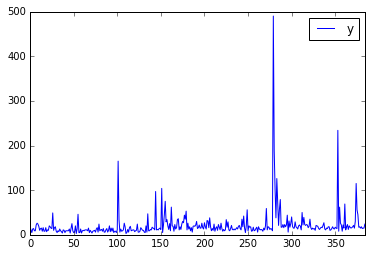

In [7]:
newdf = fromSeriesToDF(series)
df_size = newdf.shape[0]
train_df,test_df,until = getTrainTest(newdf,df_size,30)
train_df.plot()
plt.show()

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


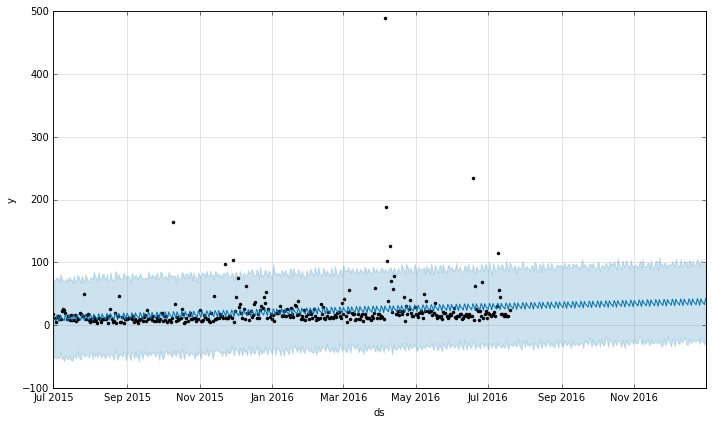

In [8]:
from fbprophet import Prophet
my_model = Prophet(interval_width=0.95)
my_model.fit(train_df)
future_dates = my_model.make_future_dataframe(periods=df_size-until)
forecast = my_model.predict(future_dates)
my_model.plot(forecast,uncertainty=True)

In [9]:
def smape(actual,forecasted):
    if len(actual) != len(forecasted):
        raise Exception("Lists not equal")
    lst_size = len(actual)
    sum = 0
    for i in range(0,lst_size):
        sum += (np.absolute(forecasted[i] - actual[i]))/(np.absolute(forecasted[i]) + np.absolute(actual[i]))
    return sum / lst_size

In [10]:
forecasted_values = unwrap(forecast[['yhat']].values.tolist()[until:])
test_values = unwrap(test_df[['y']].values.tolist())
print(1 - smape(test_values,forecasted_values))

0.689863875276


In [11]:
df.iloc[1]

Page          2PM_zh.wikipedia.org_all-access_spider
2015-07-01                                        11
2015-07-02                                        14
2015-07-03                                        15
2015-07-04                                        18
2015-07-05                                        11
2015-07-06                                        13
2015-07-07                                        22
2015-07-08                                        11
2015-07-09                                        10
2015-07-10                                         4
2015-07-11                                        41
2015-07-12                                        65
2015-07-13                                        57
2015-07-14                                        38
2015-07-15                                        20
2015-07-16                                        62
2015-07-17                                        44
2015-07-18                                    

In [18]:
'2PM_zh.wikipedia.org_all-access_spider' in unwrap(df[['Page']].values.tolist())

True

In [20]:
'bn_ru.wikipedia.org_desktop_all-agents' in unwrap(df[['Page']].values.tolist())

False